# Bank loans

A bank plans its loan policy. The total budget is up to $12 milion.
The possible loan types are:

| loan type | interest | risk |
|-----------|--------|-----|
| Personal  | .140   | .10 |
| Car       | .130   | .07 |
| Household | .120   | .03 |
| Farms     | .125   | .05 |
| Bussiness | .100   | .02 |


To simplify the calculations, we assume that the risk loans will not payback anything.
Due to regulation, at least 40% of allocated money but go to farms or bussiness projects.
Due to regional policy, the household loans must be at least half of money allocated
to household, personal and car loans.
To avoid the whole poject being too risky, the risk loans must be at most 4% of all loans.
How should the bank set the loan policy to maximize its earnings.

In [1]:
data = [
    ("personal", .140, 0.1),
    ("car"     , .130, 0.07),
    ("house"   , .120, 0.03),
    ("farms"   , .125, 0.05),
    ("bussiness",.100, 0.02),
]
P = MixedIntegerLinearProgram(maximization=True)
x = P.new_variable(nonnegative=True, integer=True)
s = P.sum( x[i] for i in range(len(data)) )
P.add_constraint(s <= 12_000_000)
P.add_constraint(x[3] + x[4] >= 0.4 * s)
P.add_constraint(x[2] >= 0.5*(x[2] + x[0] + x[1]))
P.add_constraint(P.sum( data[i][2]*x[i] for i in range(len(data)) ) <= 0.04*s)
P.set_objective(P.sum( (1-data[i][2])*(1 + data[i][1])*x[i] for i in range(len(data)) ))
sol = P.solve()
sol, P.get_values(x)

(12996480.0, {0: 0.0, 1: 0.0, 2: 7200000.0, 3: 0.0, 4: 4800000.0})

# Point separation
You are given two sets of points: black and red. You task is to find a line which separates black and red points.
You may assume that line parallel with y-axis is never a solution.

In [2]:
point_sets = [
    {"black":[
        [-18696,-7622],[-9507,2766],[-606,-12929],[-18153,13773],[-13849,-9818],[-15036,-10614],[-12732,-7760],[279,-11867],
        [-19409,-5654],[-12110,859],[-5654,-17544],[-15400,12070],[-18373,-595],[-11888,-9372],[-17018,-13533],[-1884,-16962],
        [-15963,2086],[-15130,-10194],[-17569,1064],[-19089,-11955],[-19637,1385],[-10732,-16074],[-5827,-12756],[-14789,1622],
        [-19944,14320],[-13649,719],[-5736,-2697],[-3723,-12397],[-11766,-16796],[-14917,4362],[-11841,-6097],[-11642,-14858],
        [-13850,639],[-5022,-4003],[-19551,-2751],[828,-16459],[-18063,-8444],[-7817,-622],[-9619,1626],[-3450,-19773],
        [-4199,-18748],[-18371,9045],[-15438,12680]],
     "red":[
         [7284,15539],[13473,293],[8473,14157],[-5670,19128],[2053,16099],[10337,10526],[-6853,17759],[18704,17951],
         [-2487,602],[-6388,17862],[9428,15933],[2243,-12127],[2886,-2748],[3595,4590],[4614,-3431],[-3214,-2094],
         [-6271,19367],[12794,-8700],[7094,-223],[15730,-18544],[-3835,435],[12570,-18044],[2493,-1457],[6835,14932],
         [-8395,7125],[15272,11036],[-4613,8504],[17527,-2778],[-4598,6043],[17656,14510],[4441,-2122],[4584,17428],
         [-1340,4434],[14283,17595],[-540,-2763],[-8191,16686],[11907,18450],[17978,17080],[9342,18405],[-4758,-1364],
         [-10570,17455],[14552,-11267],[11775,710],[-15804,19376],[5246,9032],[272,3172],[16984,-5459],[-6234,14116],
         [11816,4257],[-5189,11859],[13932,8569],[10491,16115],[-1652,-729],[7575,2600],[19456,6872],[18124,-845],[7689,8963]]},
    {"black":[
        [-17834,-11695],[10712,-4403],[-9730,-15197],[14497,-17228],[10492,-3716],[-9842,76],[-14368,-3871],[-10594,-12605],
        [-6731,1050],[-10894,-13136],[4606,-5753],[-7580,2682],[-5887,-10916],[-16721,-10177],[-6878,5235],[3083,-19450],
        [6992,638],[-12630,-18791],[13334,-15892],[9294,4009],[19120,-19868],[-16291,1389],[16913,-13516],[7471,366],
        [-1657,4306],[1323,-14827],[-6471,-17177],[-10592,7094],[-10164,12742],[18675,-19616],[-17629,-2120],[13553,1785],
        [16798,-15206],[13419,-9147],[-1702,-698],[10902,-12855],[-12115,-13001],[7084,-11798],[-17468,-5476],[55,-2715],
        [-16456,12676],[2456,-14728],[-9105,9070],[-18701,-10687],[19200,-11367],[-15566,6248],[-4694,-8210],[-11360,8829],
        [-14475,-1192],[-10819,-2872],[-3178,1196],[-8672,-15120],[-13984,11799],[-10689,-1594],[-13413,-7767],[-17662,-1124],
        [7892,1935],[-14313,-9545],[12570,167],[6790,-10557],[14095,1294],[-5453,-4826],[6868,-1101],[-8814,-12038],[9609,-18823],
        [-252,-12704],[-17804,-17802],[-13226,6394],[-8711,3024],[133,-17361],[13230,-15564],[-10708,668],[-1135,-9515],
        [6946,-15399],[19064,2232],[-4457,4621],[-19398,540]],
     "red":[
         [18024,14535],[2694,10943],[1475,16887],[-15317,19284],[7856,10793],[10615,8656],[14717,12152],[-8057,13397],[893,15988],
         [576,14494],[17866,15425],[15884,5805],[14422,11145],[-6168,18823],[15264,14777],[15408,9232],[-7401,17631],
         [-14948,16505],[17165,14173],[15648,8631],[11912,10260],[-5847,18580],[18253,6089]]},
]

In [3]:
def plot_points(pts, c): return sum( point(p, color=c) for p in pts )
def plot_sol(inp, a = 1, b = 1):
    x = var("x")
    clip = 20000
    return plot_points(inp["black"], "black") + plot_points(inp["red"], "red") + plot(a*x+b, xmin=-clip, xmax=clip, ymin=-clip, ymax=clip)

In [4]:
black = point_sets[0]["black"]
red = point_sets[0]["red"]

In [5]:
def separate_points(black, red):
    P2 = MixedIntegerLinearProgram(maximization=True)
    xx = P2.new_variable()
    a, b, eps = xx[0], xx[1], xx[2]
    for px, py in red:
        P2.add_constraint(a*px + b + eps <= py)
    for px, py in black:
        P2.add_constraint(a*px + b >= eps + py)
    P2.add_constraint(eps >= 0)
    P2.set_objective(eps)
    sol = P2.solve()
    return sol, P2.get_values(a), P2.get_values(b)

In [6]:
eps, a, b = separate_points(point_sets[0]["black"], point_sets[0]["red"]); eps, a, b

(1318.0763504485592, -1.5618120506457975, -10113.17808742126)

Value of the objective function describes how well are the points separated. If it is negative, it was not possible to separate the points either because it is not possible at all or because we guessed wrong whether red ones should be above the line.

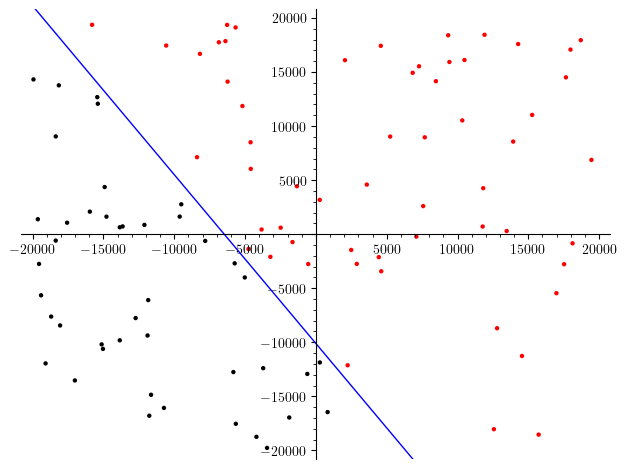

In [7]:
plot_sol(point_sets[0], a, b)

In [8]:
eps, a, b = separate_points(point_sets[1]["black"], point_sets[1]["red"]); eps, a, b

(706.3245860134081, -0.3595866976871495, 9793.48539072123)

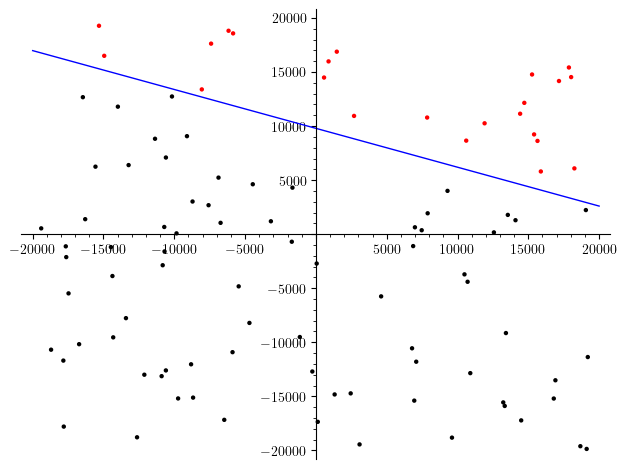

In [9]:
plot_sol(point_sets[1], a, b)